In [4]:
# Algunas bibliotecas que ocuparemos
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from numpy.linalg import *
import pylab
from sklearn import datasets


![](iris.png)

In [43]:
iris = datasets.load_iris()
data = iris.data[:100]
target = iris.target[:100]
data = (data - data.min(axis=0))/(data.max(axis=0)-data.min(axis=0))
P =len(data)

idx = np.random.permutation(P)
data_training = data[idx[:int(P*.8)]]
target_training = target[idx[:int(P*.8)]]

data_testing = data[idx[int(P*.8):]]
target_testing = target[idx[int(P*.8):]]


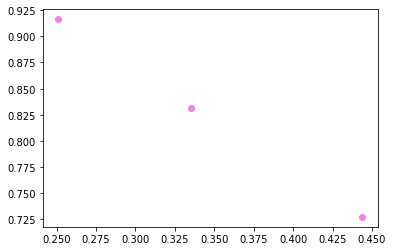

In [44]:
colors = "bgrcmykw"
plt.plot(np.random.random(3), np.random.random(3), 'o', c=np.random.rand(3))
plt.show()

[[0.26287263 0.5995935  0.11481261 0.08321377]
 [0.5982906  0.32371795 0.7811132  0.70286576]]
[0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0
 0 1 0 1 1 0]


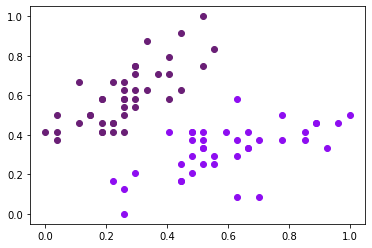

In [53]:
mu, idx = kmeans2(data_training, 2)
print (mu)
print (idx)
for i in range(2):
    
    my_set = data_training[idx==i]
    plt.plot(my_set[:,0], my_set[:,1], 'o', c=np.random.rand(3))
    

0.12690734718109165


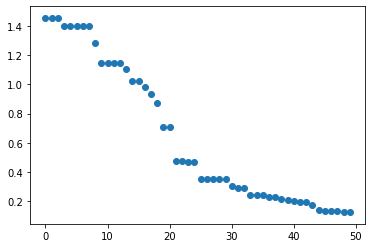

In [83]:
def f(x):
    return np.sum(x*x, axis=1)
lb = -1.5
ub = 2.0
N = 10
n = 10
t = 0
G = 50
CR = 0.8
F = 0.5

x = np.random.random((N,n))
u = np.zeros((N,n))
fx = f(x)

conv = []
while(t < G):
    for i in range(N):
        [r1, r2, r3] = np.random.permutation(N)[:3]
        irand = np.random.randint(n)
        for j in range(n):
            if np.random.random() < CR or j == irand:
                u[i,j] = x[r3,j] + F * (x[r1,j] - x[r2,j])
                if u[i,j] < lb or u[i,j] > ub:
                    u[i,j] = (x[r1,j] + x[r2,j] + x[r3,j])/3.0
            else:
                u[i,j] = x[i,j]
    fu = f(u)
    idx = fu < fx
    fx[idx] = fu[idx]
    x[idx] = u[idx]
    conv.append(np.min(fx))
    
    t += 1

print(np.min(fx))
plt.scatter(range(G), conv)


In [76]:
print (np.random.permutation(N)[:3])

[6 4 8]


In [77]:
u = np.zeros((N,n))
print (u)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
